In [ ]:
import os
import leafmap
from samgeo import SamGeo, show_image, overlay_images, SamGeo2
from pyproj import Transformer

In [5]:
# Define the bounding box in EPSG:3857 (Web Mercator)
bbox_3857 = [-13610577.729, 4560823.588, -13609041.520, 4561655.600]

# Transform bbox to EPSG:4326 (latitude/longitude)
transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326", always_xy=True)
min_lon, min_lat = transformer.transform(bbox_3857[0], bbox_3857[1])
max_lon, max_lat = transformer.transform(bbox_3857[2], bbox_3857[3])
bbox_4326 = [min_lon, min_lat, max_lon, max_lat]

print("Transformed bbox (EPSG:4326):", bbox_4326)

# Initialize the map centered around the transformed bounding box
m = leafmap.Map(center=[(min_lat + max_lat) / 2, (min_lon + max_lon) / 2], zoom=17, height="800px")
m.add_basemap("SATELLITE")



Transformed bbox (EPSG:4326): [-122.26589999657467, 37.868199999716396, -122.25209999633164, 37.874099996996726]


In [6]:
# Use your custom image
image = "ScanAI/SamGeo/Rensvik.tif"
print("File exists:", os.path.exists(image))
print("Absolute path:", os.path.abspath(image))

# Add your raster image to the map
m.add_raster(image, layer_name="Rensvik Image")
m


File exists: True
Absolute path: /home/siverteh/ScanAI/SamGeo/Rensvik.tif


Map(center=[63.0966015, 7.8194035], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [7]:
sam2 = SamGeo2(
    model_id="sam2-hiera-large",
    apply_postprocessing=False,
    points_per_side=32,
    points_per_batch=4,
    pred_iou_thresh=0.7,
    stability_score_thresh=0.92,
    stability_score_offset=0.7,
    crop_n_layers=1,
    box_nms_thresh=0.7,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=25.0,
    use_m2m=True,
)

In [8]:
sam2.generate(image, output="masks2.tif")

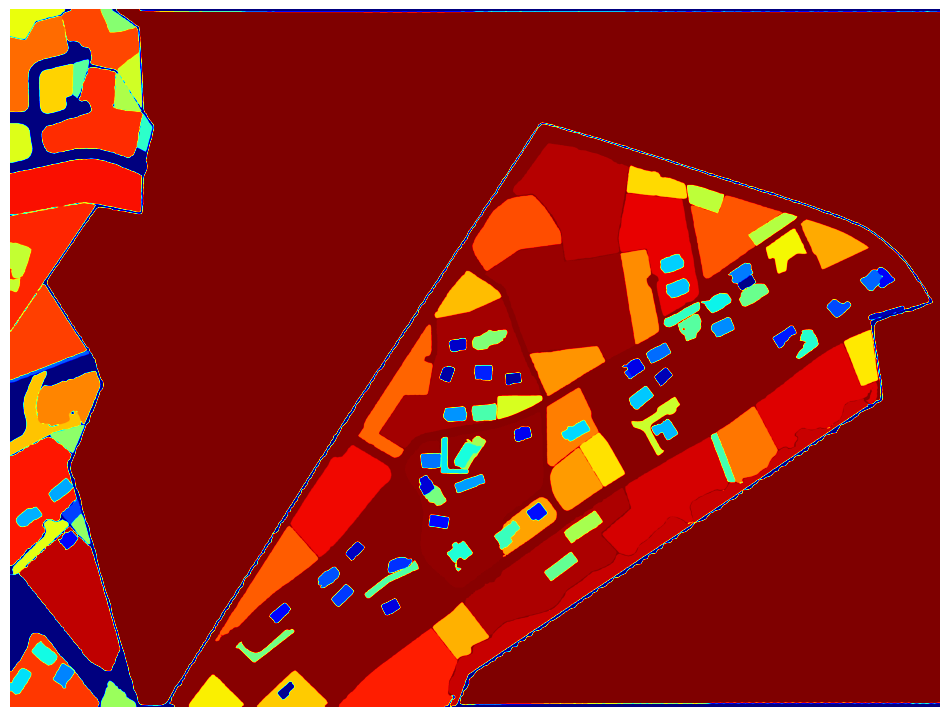

In [9]:
sam2.show_masks(cmap="jet")

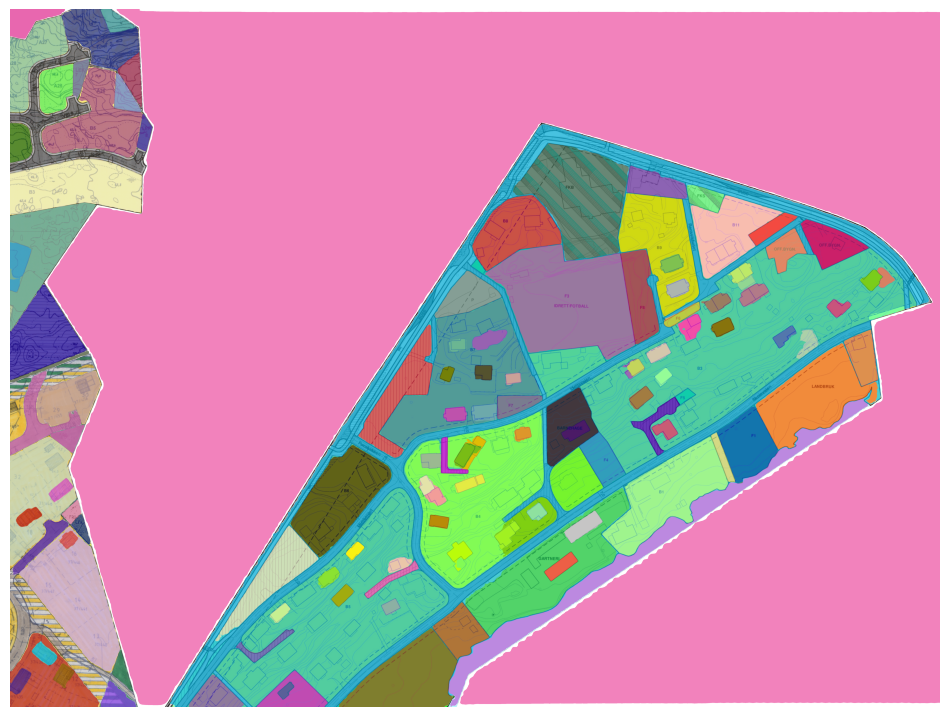

In [10]:
sam2.show_anns(axis="off", alpha=0.7, output="annotations2.tif")

In [11]:
# Compare original image and annotations
leafmap.image_comparison(
    "datasets/Rensvik.tif",
    "annotations2.tif",
    label1="Satellite Image",
    label2="Object Annotations",
)

FileNotFoundError: [Errno 2] No such file or directory: '/home/siverteh/datasets/Rensvik.tif'

In [ ]:
sam2.show_map()